
# Project:  - TMDb Movies Dataset by Oluremi Ogunwale

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

>  This dataset contains information about 10,000 movies collected from the movie database (TMDb) including user ratings and revenue. There are certain columns like  ‘genres’, 'keywords' and cast' that contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
> In this data, we will be answering questions like;

#### RESEARCH QUESTION 1: What kind of properties are associated with movies that have high revenue?


#### RESEARCH QUESTION 2: What is the relationship between a movie runtime and popularity? ie Does a movie runtime determines how popular the movie will be?

##### In the next cell, i will import all the packages that will be needed for this analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties
>  #### In this section, we will be inspecting the data structure, properties and check for any discrepancies that needs cleaning and changes.

In [1]:
import pandas as pd
df_movies =pd.read_csv('tmdb-movies.csv')
df_movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
df_movies.shape

(10866, 21)

The data has 10,866 columns and 21 rows

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### It is observed that the dataset consists of missing values. The release_date datatype format is wrong, instead of datetime, it is seen as a string. In the data cleaning section, we will be changing the release_date format to datetime format.

In [4]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### The above cells shows useful desprictive statistics for each column of our dataset

In [5]:
df_movies.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


#### It can be observed that the columns; budget and revenue did have a lot of 0 as values


In [6]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Above are the total no of rows in each columns that contains missing values and most columns with missing values are strings. This could be as a result of missing informations or lost data while collating the dataset.


#### Rows with missisng values will be dropped under the data cleaning structure.


In [7]:
df_movies.hist();

#### An histogram distribution of the whole dataset.

In [8]:
sum(df_movies.duplicated())

1

In [9]:
#####We have just one duplicated rows.


### Data Cleaning
* In this section, i will be converting some columns to their suitable datatypes. 

* Drop some duplicates data and rows with missing values.

* Remove some columns that are not needed for our anaylsis.


 

#### After calculating the duplicate rows, we can drop these row using 'drop_duplicates()' function while also using the inplace function to return the changes

In [10]:
df_movies.drop_duplicates(inplace = True)

In [11]:
df_movies.shape 

(10865, 21)

Now we have a total of 10,865 rows and 21 columns

#### CONVERTING RELEASE_DATE COLUMN TO DATETIME FORMAT


In [12]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

To confirm our changes,lets check the data information again.

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

#### I will be dropping columns that are not usable for our data analysis process. [imdb_id,overview, homepage, tagline, overview, budget_adj and revenue_adj]

In [14]:
df_movies.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)

In [15]:
df_movies.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


#### In the next cell, i will be filling the string columns that contains NAN, with spaces.

In [16]:
df_movies.fillna('', inplace=True)

In [17]:
##to confirm
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
keywords                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 1.3+ MB


#### Our last cleaning step is to convert cast, genres, keyword, director and production_companies columns to an array for easy use. 

My choice to convert them to an array using the string.split() method was because i couldn't use the 'explode' function to convert these columns to a list. 

Getting help from stackflow, i was told to import the "ast" package but i still couldn't achieve that, so i saw another alternative function the string.split() method to create an array.

In [18]:
def string_to_array(data):
    
    return data.split('|')

The above function returns the given data in the colums that are seperated by `|` and returns the result as a list. 

In [19]:
df_movies.cast = df_movies.cast.apply(string_to_array)

In [20]:
df_movies.keywords = df_movies.keywords.apply(string_to_array)

In [21]:
df_movies.director = df_movies.director.apply(string_to_array)

In [22]:
df_movies.production_companies = df_movies.production_companies.apply(string_to_array)

In [23]:
df_movies.genres = df_movies.genres.apply(string_to_array)

In [24]:
##to confirm
df_movies.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015


#### Now, our dataset is ready and clean, we move to answering our data questions.

<a id='eda'></a>
## Exploratory Data Analysis

> #### Research Question 1: What type of properties are associated with movies that have high revenues?


For this analysis, we consider movies with at least 1 billion USdollars as high paying movies. 

###### Important: Currency wasn't given for the budget and revenue columns, so i will be using the US dollar curency for this analysis.



It is observed that Avatar, Star Wars, Titanic, The Avengers and Jurassic world are the movies with the highest revenues in particular order.

In [25]:
high_revenue_movies = df_movies[df_movies['revenue'] >= 1000000000]\
                            .sort_values(by='revenue', ascending=False)
high_revenue_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon...",162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,8458,7.1,2009
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015
5231,597,4.355219,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",[James Cameron],"[shipwreck, iceberg, ship, panic, titanic]",194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",1997-11-18,4654,7.3,1997
4361,24428,7.637767,220000000,1519557910,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",[Joss Whedon],"[new york, shield, marvel comic, comic, superh...",143,"[Science Fiction, Action, Adventure]",[Marvel Studios],2012-04-25,8903,7.3,2012
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015


It can also be observed via the illustration below that there is no relationship between a movie runtime and its revenues.

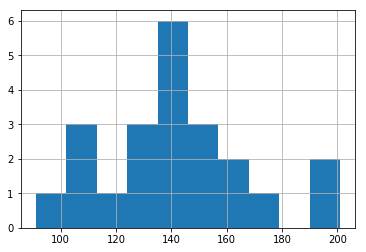

In [26]:
high_revenue_movies.runtime.hist()

It can be seen below that movies with high revenues are also voted highly with high-revenue movies having an average vote of 7.5. It shows that movies with high revenues are also popular. So we can say, there is some association between the two variables.

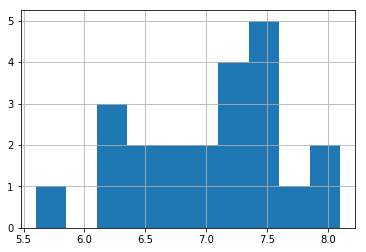

In [27]:
high_revenue_movies.vote_average.hist();

#### To find out how these properties like genres, directors,production_companies,  budget, vote_average and runtime is associated to a movie having high revenue, i will be counting the item frequencies of a list by defining a frequency count. 

This functiom returns a dictionary-like string and displays the number of times each element appears in the list.

In [28]:
def count_frequency(df_movies):
    frequency_count = {}
    for items in df_movies:
        for item in items:
            if item in frequency_count:
                frequency_count[item] += 1
            else:
                frequency_count[item] = 1
    return frequency_count

In [29]:
high_revenue_genres = count_frequency(high_revenue_movies.genres)
print(high_revenue_genres)

{'Action': 16, 'Adventure': 16, 'Fantasy': 8, 'Science Fiction': 7, 'Drama': 4, 'Romance': 1, 'Thriller': 7, 'Crime': 4, 'Family': 5, 'Animation': 3, 'Comedy': 2, 'Mystery': 1}


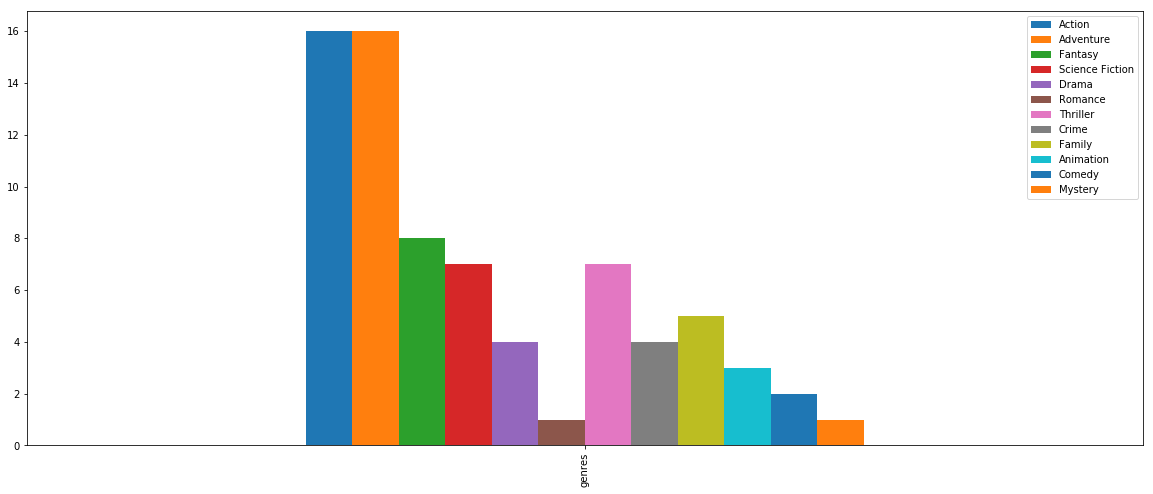

In [30]:
#plot high_revenue_genres
pd.DataFrame(high_revenue_genres, index=['genres']).plot(kind='bar', figsize=(20, 8))




#### It is also observed above that Action movies and Adventure movies are the movie genres that has high revenues.


In [31]:
high_revenue_director = count_frequency(high_revenue_movies.director)
print(high_revenue_director)

{'James Cameron': 2, 'J.J. Abrams': 1, 'Joss Whedon': 2, 'Colin Trevorrow': 1, 'James Wan': 1, 'David Yates': 1, 'Chris Buck': 1, 'Jennifer Lee': 1, 'Shane Black': 1, 'Kyle Balda': 1, 'Pierre Coffin': 1, 'Michael Bay': 1, 'Peter Jackson': 2, 'Sam Mendes': 1, 'Irwin Winkler': 1, 'Christopher Nolan': 2, 'Gore Verbinski': 1, 'Lee Unkrich': 1, 'Tim Burton': 1, 'Rob Marshall': 1}


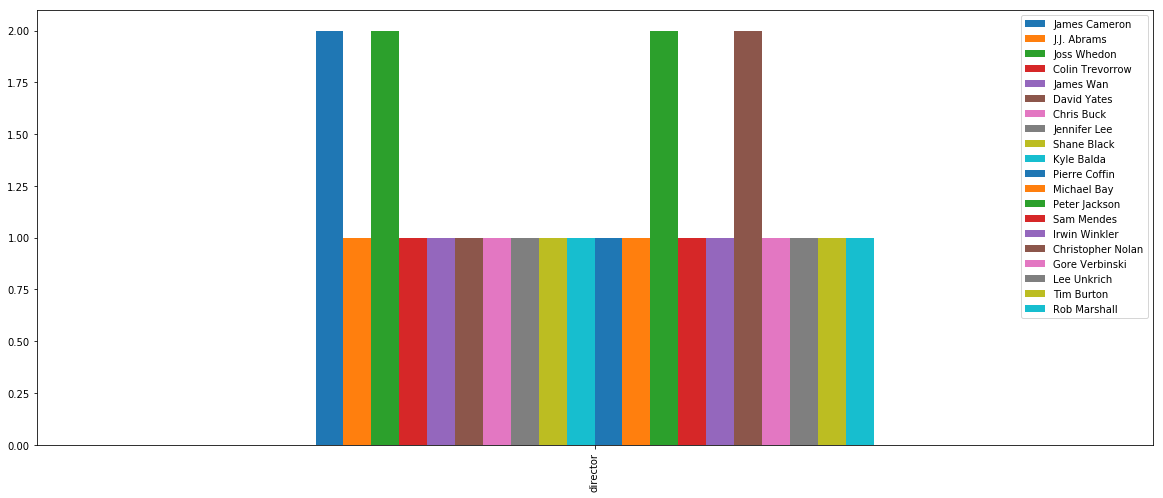

In [32]:
##plot high_revenue_director
pd.DataFrame(high_revenue_director, index=['director']).plot(kind='bar', figsize=(20, 8))

Most of the directors appeared in one movies that raised at least 1 billion revenue. so, there is no corellation between the directors and movies with high-revenues.


In [33]:
high_revenue_production_companies = count_frequency(high_revenue_movies.production_companies)
print(high_revenue_production_companies)

{'Ingenious Film Partners': 1, 'Twentieth Century Fox Film Corporation': 2, 'Dune Entertainment': 1, 'Lightstorm Entertainment': 2, 'Lucasfilm': 1, 'Truenorth Productions': 1, 'Bad Robot': 1, 'Paramount Pictures': 2, 'Marvel Studios': 3, 'Universal Studios': 1, 'Amblin Entertainment': 1, 'Legendary Pictures': 3, 'Fuji Television Network': 1, 'Dentsu': 2, 'Universal Pictures': 2, 'Original Film': 1, 'Media Rights Capital': 1, 'One Race Films': 1, 'Prime Focus': 1, 'Revolution Sun Studios': 1, 'Warner Bros.': 3, 'Heyday Films': 1, 'Moving Picture Company (MPC)': 2, 'Walt Disney Pictures': 5, 'Walt Disney Animation Studios': 1, 'Illumination Entertainment': 1, 'Di Bonaventura Pictures': 1, 'Hasbro': 1, 'Indochina Productions': 1, 'WingNut Films': 2, 'New Line Cinema': 2, 'Columbia Pictures': 2, 'DC Entertainment': 1, 'Syncopy': 2, 'Jerry Bruckheimer Films': 2, 'Second Mate Productions': 1, 'Pixar Animation Studios': 1, 'Team Todd': 1, 'Tim Burton Productions': 1, 'Roth Films': 1, 'Zanuck 

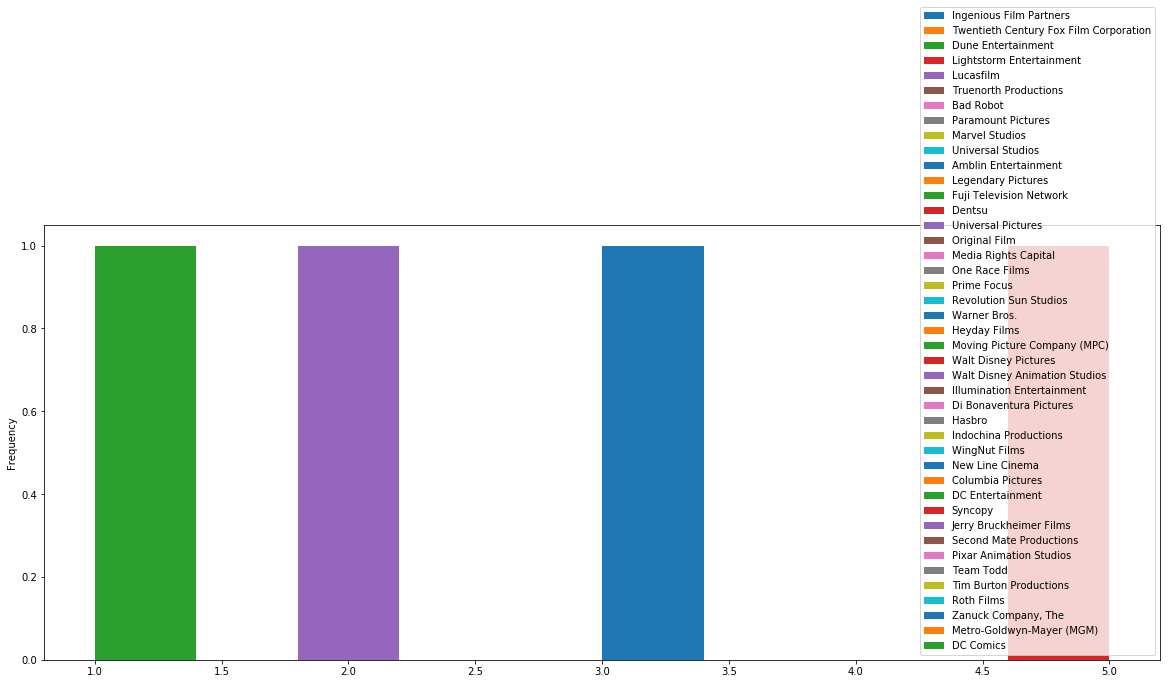

In [34]:
##plot high_revenue_production_companies
pd.DataFrame(high_revenue_production_companies, index=['Production_companies']).plot(kind='hist', figsize=(20, 8))

The production companies in the dataset like ingenious film, prim focus, DC Comics, warner Bros have produced movies that generated at least 1 billion dollar revenues.

Therefore, there are no relationship between the movies directors and movies with high-revenue.

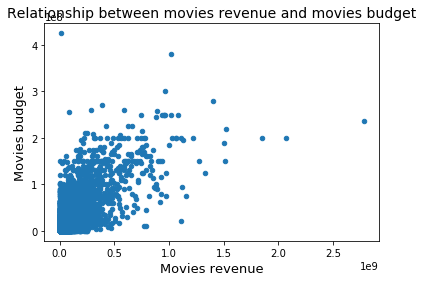

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_movies =pd.read_csv('tmdb-movies.csv')

df_movies.plot(x='revenue', y='budget',kind= 'scatter');
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Relationship between movies revenue and movies budget",fontsize = 14)
plt.xlabel('Movies revenue',fontsize = 13)
plt.ylabel('Movies budget',fontsize = 13)
sns.set_style("darkgrid")


Using the scatter plot, there seem to be a relationship between movie budgets and revenues. 

It can be observed that the higher the budget used in carrying out a movie project,the higher the revenue.


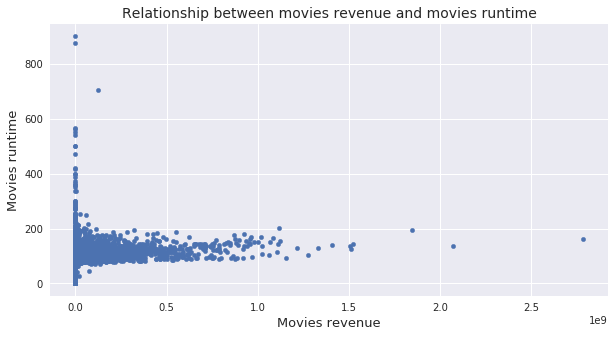

In [36]:

df_movies.plot(x='revenue', y='runtime',kind= 'scatter');
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Relationship between movies revenue and movies runtime",fontsize = 14)
plt.xlabel('Movies revenue',fontsize = 13)
plt.ylabel('Movies runtime',fontsize = 13)
sns.set_style("darkgrid")


There is no correlation between a movie's lenght('runtime') and movies with high-revenue. So, the movies runtime doesn't determine if movies will have high revenue.

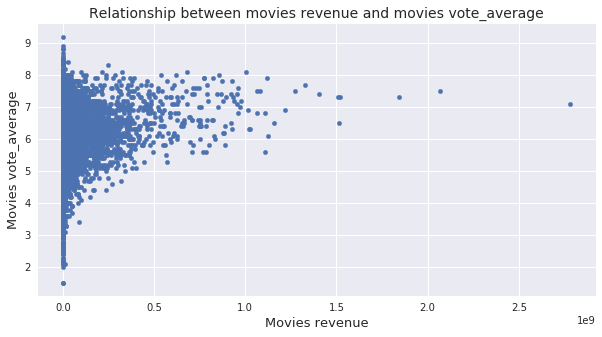

In [37]:
df_movies.plot(x='revenue', y='vote_average',kind= 'scatter');
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Relationship between movies revenue and movies vote_average",fontsize = 14)
plt.xlabel('Movies revenue',fontsize = 13)
plt.ylabel('Movies vote_average',fontsize = 13)
sns.set_style("darkgrid")

Based on the above illustration, same can be said of movies with high-revenue and voting average, there are no correlations. 

### Research Question 2:  What is the relationship between a movie popularity and runtime? ie Does a movie runtime determines the movie's popularity?

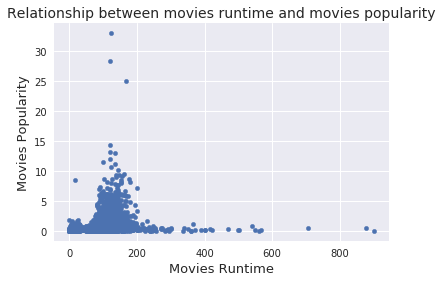

In [38]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_movies.plot(x='runtime', y='popularity',kind= 'scatter');
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Relationship between movies runtime and movies popularity",fontsize = 14)
plt.xlabel('Movies Runtime',fontsize = 13)
plt.ylabel('Movies Popularity',fontsize = 13)
sns.set_style("darkgrid")

With above illustration, we can see that movies runtime or lenght doesn't determine how popular the movie will be but movies runtime less than 200mins are mostly popular among viewers than movies lenght above 200 mins.


<a id='conclusions'></a>
## Conclusions

> In this dataset, we answered two questions which will be summarised below.

1. There is a correlation between movie budget and revenue. Movies with higher budget have shown a corresponding increase with high revenues.

2. Actions and Adventures genres are movies with the highest revenue.

3. There seem to be a slight correlation between movies with high revenue and voting average. High revenue movies did have an average voting rate of 7.5, which is safe to say, high revenue movies are also popular.

4. Also movie directors do not influence whether a movie will generate high income because it is observed in the dataset that at least one director has a movie with at least a billion dollar.

5. We found no relationship between a movie runtime with its popularity. So, the movie runtime doesn't determine if the movie will be popular.


Limitations

During the data cleaning process, I split the data seperated by '|' into lists using the string.split() method for easy parsing during the exploration phase. I couldnt use the 'explode' function, so i had difficulty in solving that problem. This increases the time taken in solving that particular function.


Also, i had issues with my machine, which i had to refresh my notebook multiple times for my functions to work.


I would like to also point out that this anaysis is not 100% but it showed that following or using these properties could create high-revenue movies and aslo help production companies to know the kind of movie attributes they could apply in their movies that will increase viewers expectations and votings.

REFERENCES

https://stackoverflow.com/

https://www.geeksforgeeks.org/

https://pandas.pydata.org/

https://matplotlib.org/

https://www.google.com/
> 


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDb Movies Dataset-2022.ipynb'])

0